Week-14
===

<Large>


```

   When I was young, no grief did cloud mine eye,
     Yet penned I woes as if my heart did sigh.
   Now Time hath etched its mark upon my face,
     Though strength remains, my codes find no embrace.  

  少年不知愁滋味，為賦新詞強說愁
  馬齒漸長力不滯，程式編碼空徒勞
               -- 切特•基匹梯

```


1. Chipotle dataset, Associate Rule Analysis
2. ...


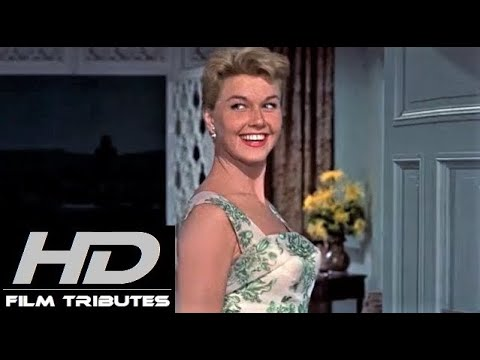

In [42]:
#https://youtu.be/i9nWB5XifBI
# Doris Day

from IPython.display import YouTubeVideo
YouTubeVideo("i9nWB5XifBI")

# Associate Rule
---

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [2]:
# As before, the first feature, "Unnamed: 0", is the `index` column

url = "https://datascience.quantecon.org/assets/data/chipotle_raw.csv.zip"

# use the first column as index
chipotle = pd.read_csv(url,index_col=0)

In [ ]:
# delect Unnamed: 0

chipotle.describe(include='all')

In [3]:
# converting item_price to a float
chipotle["item_price"] = chipotle['item_price'].apply(lambda x: float(x[1:]))

chipotle.item_price.describe()

,item_price
count,4622.000000
mean,7.464336
std,4.245557
min,1.090000
25%,3.390000
50%,8.750000
75%,9.250000
max,44.250000


In [38]:
chipotle["item_name"].value_counts()[:10]
#chipotle["item_name"].nunique()

,count
item_name,
Chicken Bowl,726
Chicken Burrito,553
Chips and Guacamole,479
Steak Burrito,368
Canned Soft Drink,301
Chips,211
Steak Bowl,211
Bottled Water,162
Chicken Soft Tacos,115


In [21]:
# Aummary above, showing the number of unique item_names
print("There are ", chipotle["item_name"].nunique(), " different items.")

There are  50  different items.


In [22]:
# details of this data

print(f'There are {len(chipotle)} items in tatal {chipotle["order_id"].nunique()} orders.')

There are 4622 items in tatal 1834 orders.


# Questions

<font size=+1>

1. How many average items is it in each order?

In [ ]:
## Answer here

In [24]:
chipotle.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [4]:
# total comsuption of orders
chipotle['total_value']=chipotle['quantity']*chipotle['item_price']
chipotle.head(5)

,order_id,quantity,item_name,choice_description,item_price,total_value
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96


In [27]:
print(chipotle.groupby("order_id")["total_value"].sum().sort_values(ascending=False).head(3))

order_id
1443    1074.24
511      315.29
1559     246.00
Name: total_value, dtype: float64


Questions
---

<Large>

2. Why is the the reason that the maximum total comsumption of singke order occured above?

In [28]:
print(chipotle.groupby("order_id")["quantity"].sum().sort_values(ascending=False).head(1))

order_id
1443    35
Name: quantity, dtype: int64



Associate Rules
---
<font size=+2>

1. Support($A$) = $\frac{\#(A_s)}{\#(\text{total items})}$, fraction of occurences;
2. Conidence = $P(A\to B)=P(B|A)=\frac{Supp(A\cap B)}{Supp(A)}$, the fraction `B` occurs if `A` occurs;
3. Lift $P(A\to B) = P(B|A)/P(B)$
, <br>i.e. ration of confident, $P(A|B)$. with respect to $Supp(B)$. It is better when this is greater than 1:
  - `lift` >1, i.e. $P(B|A)>P(B)$, B will more occur if A occurs than only B does.

In [5]:
!pip install -q mlxtend

```
                   count
   Index A IndexB.  ...

         ⬇︎  unstack()
               
               index B (features)
  Index A     
                count
```                

In [6]:
# Preview important columns
df = chipotle[['order_id', 'item_name']]

# Create basket: 1 if item is in order, else 0
basket = (
    df.groupby(['order_id', 'item_name'])['item_name']
    .count().unstack().reset_index().fillna(0)
    .set_index('order_id')
)

In [26]:
df1=df.groupby(['order_id', 'item_name'])['item_name']
df1.describe()[-5:]

count unique                  top freq
order_id item_name                                                 
1831     Chips                   1      1                Chips    1
1832     Chicken Soft Tacos      1      1   Chicken Soft Tacos    1
         Chips and Guacamole     1      1  Chips and Guacamole    1
1833     Steak Burrito           2      1        Steak Burrito    2
1834     Chicken Salad Bowl      3      1   Chicken Salad Bowl    3

In [28]:
chipotle.isna().sum()

,0
order_id,0
quantity,0
item_name,0
choice_description,1246
item_price,0
total_value,0


In [37]:
df1.count()[:5]

order_id  item_name                            
1         Chips and Fresh Tomato Salsa             1
          Chips and Tomatillo-Green Chili Salsa    1
          Izze                                     1
          Nantucket Nectar                         1
2         Chicken Bowl                             1
Name: item_name, dtype: int64

In [35]:
df2=df1.count().unstack()
df2.head(5)

item_name,6 Pack Soft Drink,Barbacoa Bowl,Barbacoa Burrito,Barbacoa Crispy Tacos,Barbacoa Salad Bowl,Barbacoa Soft Tacos,Bottled Water,Bowl,Burrito,Canned Soda,...,Steak Crispy Tacos,Steak Salad,Steak Salad Bowl,Steak Soft Tacos,Veggie Bowl,Veggie Burrito,Veggie Crispy Tacos,Veggie Salad,Veggie Salad Bowl,Veggie Soft Tacos
order_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
basket

item_name,6 Pack Soft Drink,Barbacoa Bowl,Barbacoa Burrito,Barbacoa Crispy Tacos,Barbacoa Salad Bowl,Barbacoa Soft Tacos,Bottled Water,Bowl,Burrito,Canned Soda,...,Steak Crispy Tacos,Steak Salad,Steak Salad Bowl,Steak Soft Tacos,Veggie Bowl,Veggie Burrito,Veggie Crispy Tacos,Veggie Salad,Veggie Salad Bowl,Veggie Soft Tacos
order_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1831,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Questions
---

<font size=+1>

3. What's the meaning, 1830 and 50?

In [42]:
# basket = basket.applymap(lambda x: 1 if x > 0 else 0)

basket = basket.astype(bool).astype(int)

In [43]:
# Associaion
from mlxtend.frequent_patterns import apriori, association_rules

In [45]:
# Find frequent itemsets with min_support

thread=0.02
frequent_itemsets = apriori(basket, min_support=thread, use_colnames=True)

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [46]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [48]:
rules.head(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Chicken Bowl),(Bottled Water),0.335333,0.083969,0.037623,0.112195,1.336142,1.0,0.009465,1.031793,0.378500,0.098571,0.030813,0.280124
1,(Bottled Water),(Chicken Bowl),0.083969,0.335333,0.037623,0.448052,1.336142,1.0,0.009465,1.204221,0.274638,0.098571,0.169588,0.280124
2,(Canned Soft Drink),(Chicken Bowl),0.150491,0.335333,0.060523,0.402174,1.199328,1.0,0.010059,1.111807,0.195642,0.142308,0.100564,0.291331


In [49]:
# Sort by highest lift
rules = rules.sort_values('lift', ascending=False)

In [50]:
# Show top rules
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head()

,antecedents,consequents,support,confidence,lift
4,(Canned Soft Drink),(Chips),0.031625,0.210145,1.852912
5,(Chips),(Canned Soft Drink),0.031625,0.278846,1.852912
7,(Chicken Bowl),(Chips),0.066521,0.198374,1.749124
6,(Chips),(Chicken Bowl),0.066521,0.586538,1.749124
0,(Chicken Bowl),(Bottled Water),0.037623,0.112195,1.336142


Summary
---

<font size=+2>

1. lift >1, P(X ➡︎ Y)/P(Y)>1: X makes Y more likely,
2. lift <1, P(X ➡︎ Y)/P(Y)<1: X makes Y less likely.